In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.sample(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2,NaN,C
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5,NaN,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0,C93,S


In [4]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [5]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_columns)


Numerical Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


# 1. Categorical Data

1. # a. countplot 

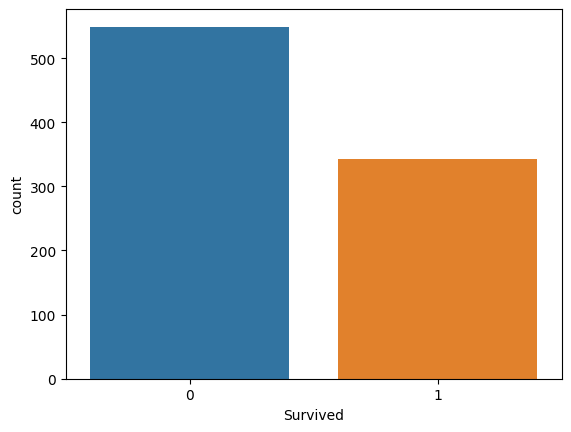

In [6]:
sns.countplot(x=df['Survived'])  #Create a Countplot for a Categorical Column
plt.show()

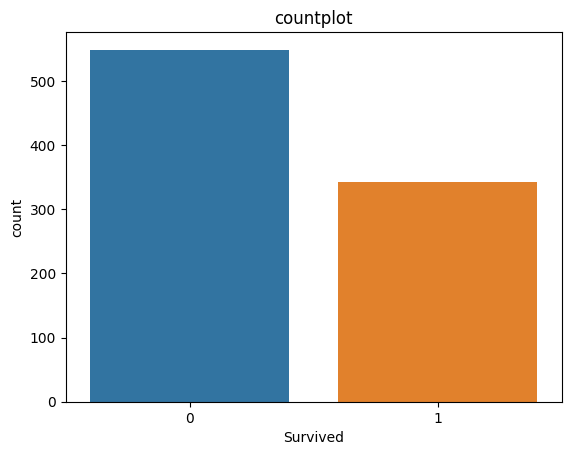

In [7]:
sns.countplot(x=df['Survived'])          # Add Titles & Labels
plt.title("countplot")
plt.xlabel("Survived")
plt.ylabel("count")
plt.show()


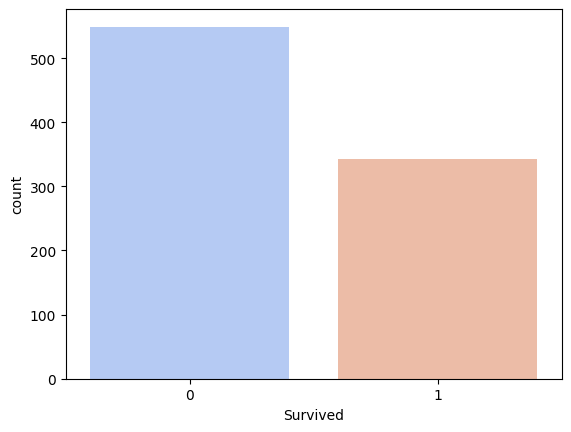

In [8]:
sns.countplot(x=df['Survived'], palette='coolwarm')  # Change color theme
plt.show()


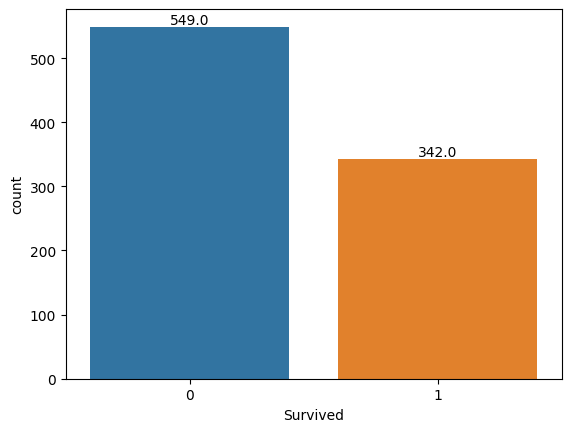

In [9]:
ax = sns.countplot(x=df['Survived'])     #Display Count Values on Top of Bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.show()


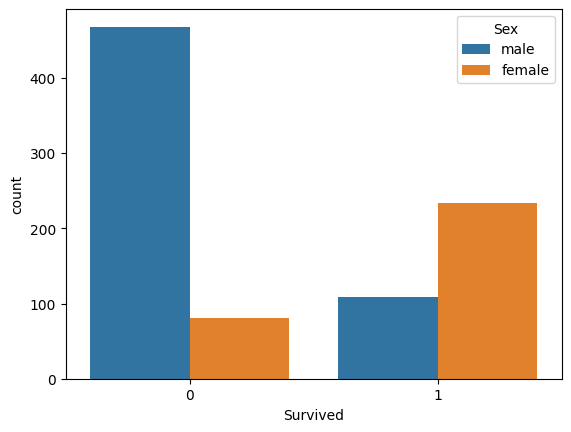

In [10]:
sns.countplot(x=df['Survived'], hue=df['Sex'])   # Grouped by Another Category
plt.show()


In [11]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

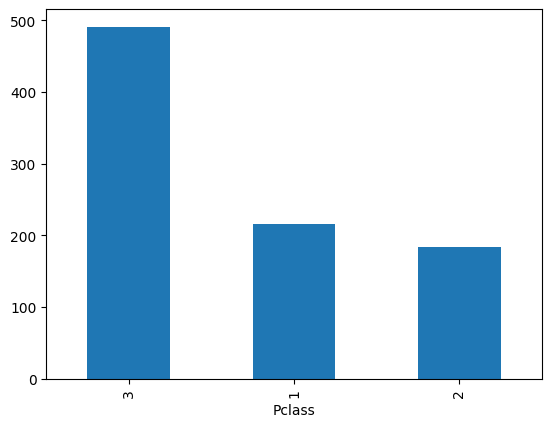

In [12]:
df['Pclass'].value_counts().plot(kind='bar')

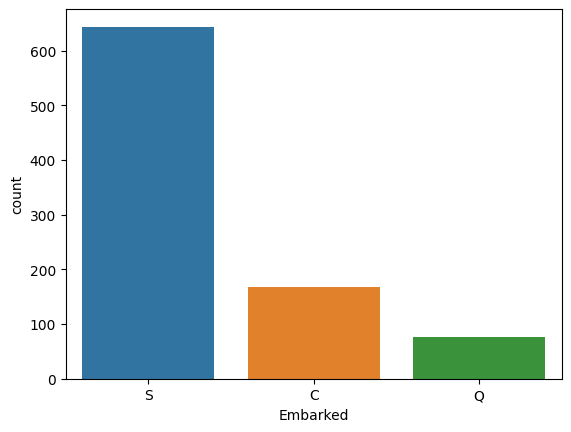

In [13]:
sns.countplot(x=df['Embarked'])  #Create a Countplot for a Categorical Column
plt.show()

* # Pie chart 

In [14]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: ylabel='count'>

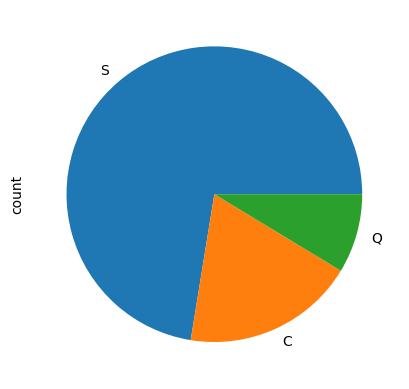

In [15]:
df['Embarked'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

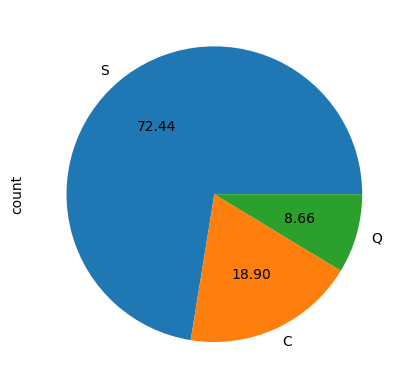

In [16]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%.2f')  # Show percentage in pie

<Axes: ylabel='count'>

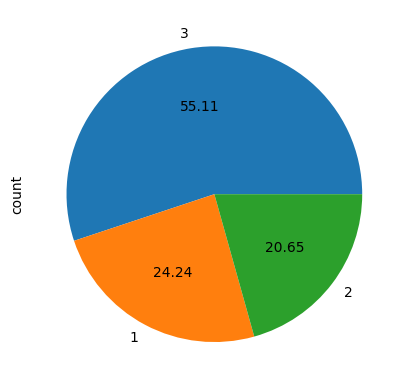

In [17]:
# Pclass
df['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

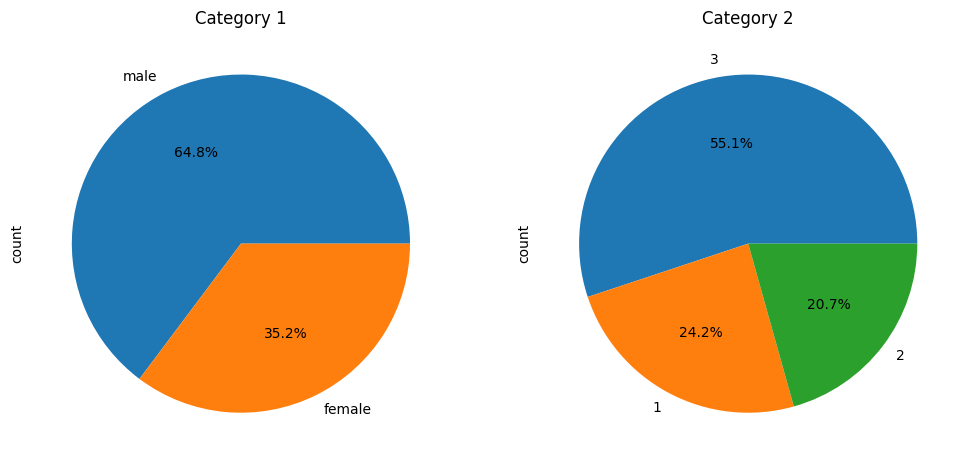

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Pie Chart 1
df['Sex'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', title="Category 1")

# Pie Chart 2
df['Pclass'].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', title="Category 2")

plt.show()


# 2. Numerical Data

In [19]:
import matplotlib.pyplot as plt

* # Histogram 

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

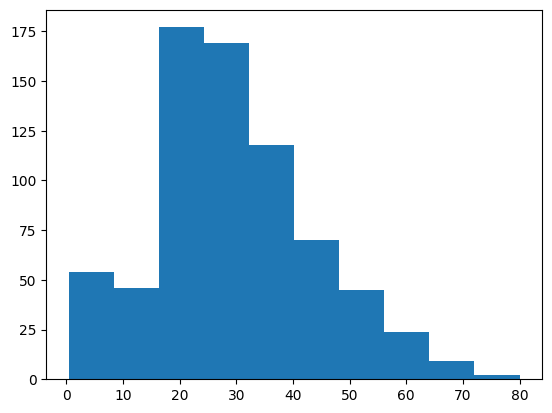

In [20]:
plt.hist(df['Age'])

(array([24., 16.,  7.,  7., 10.,  5.,  8., 23., 39., 40., 52., 46., 42.,
        43., 47., 37., 32., 41., 18., 27., 21., 14., 17., 18., 16., 13.,
         9.,  7.,  7.,  6.,  7.,  4.,  4.,  0.,  2.,  3.,  1.,  0.,  0.,
         1.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <BarContainer object of 40 artists>)

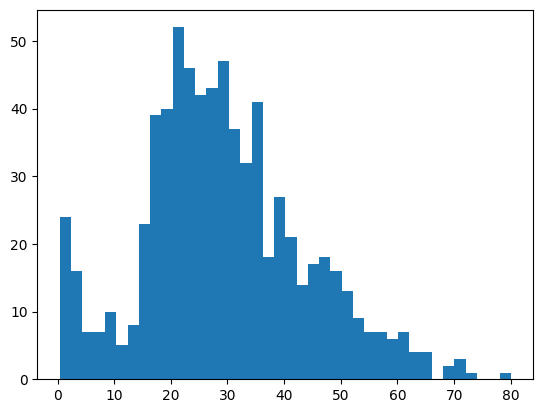

In [21]:
plt.hist(df['Age'], bins=40)

* # Distplot 

<ipython-input-22-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

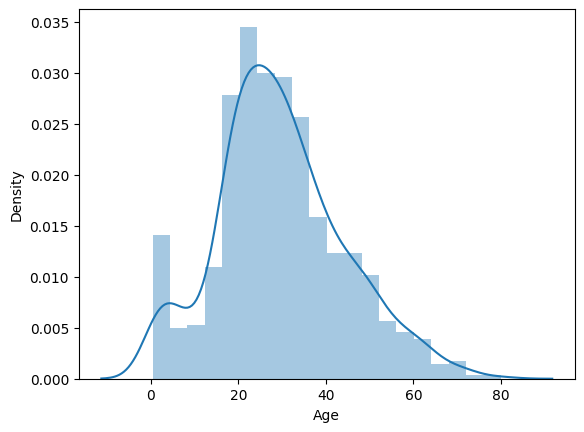

In [22]:
sns.distplot(df['Age'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

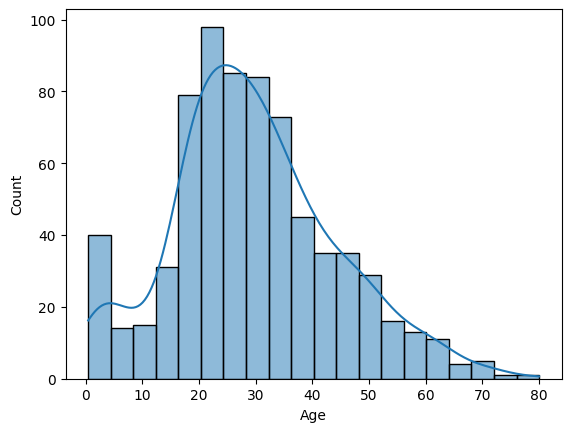

In [23]:
sns.histplot(df['Age'], kde=True)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

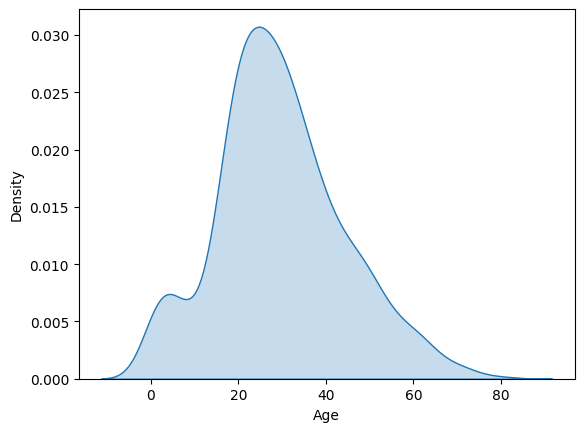

In [24]:
sns.kdeplot(df['Age'], fill=True)


* # Boxplot 

<Axes: >

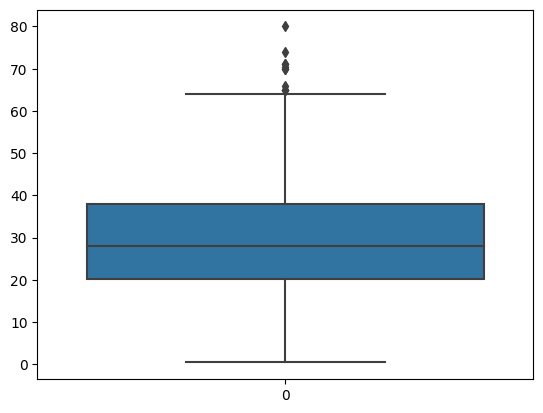

In [25]:
sns.boxplot(df['Age'])

<Axes: xlabel='Age', ylabel='Pclass'>

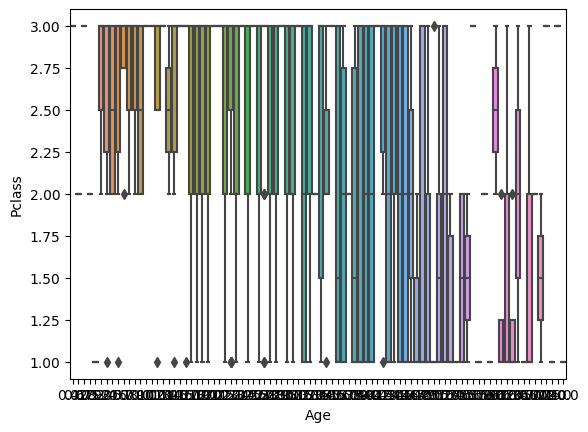

In [26]:
sns.boxplot(x='Age', y='Pclass', data=df)

In [27]:
df['Age'].min()

0.42

In [28]:
df['Age'].max()

80.0

In [29]:
df['Age'].mean()

29.69911764705882

<Axes: xlabel='Embarked'>

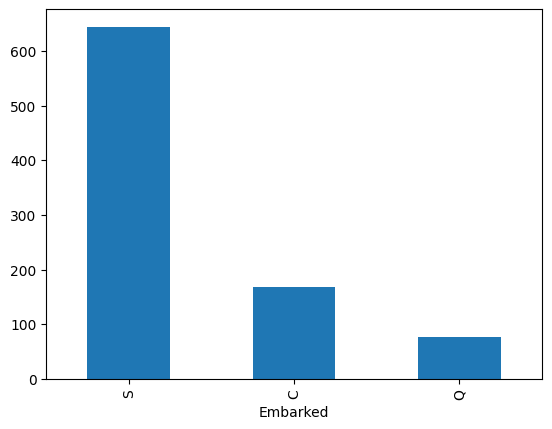

In [30]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: xlabel='Age'>

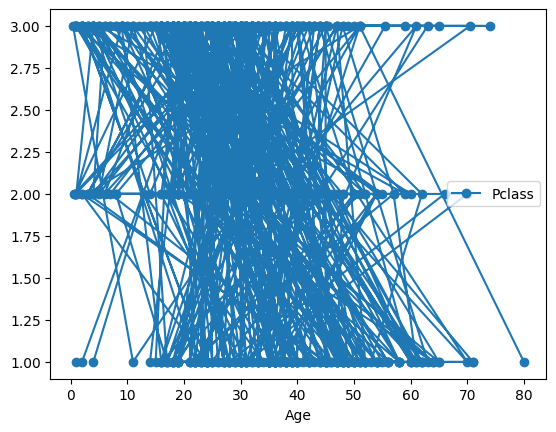

In [31]:
# Line Plot
df.plot(x='Age', y=['Embarked', 'Pclass'], marker='o', linestyle='-')

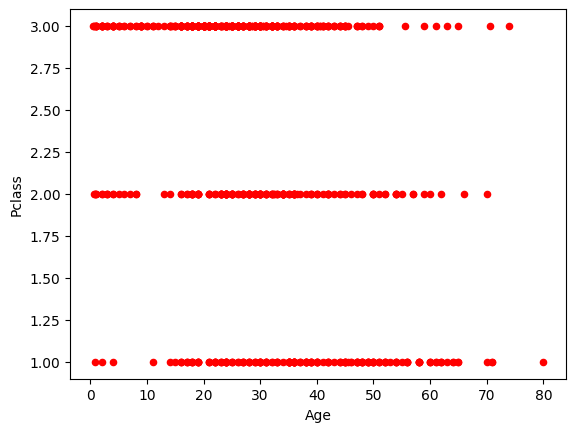

In [32]:
df.plot(x='Age', y='Pclass', kind='scatter', color='red')
plt.show()


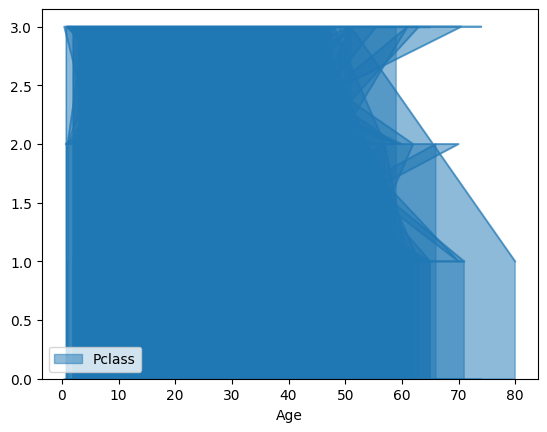

In [33]:
df.plot(x='Age', y=['Embarked', 'Pclass'], kind='area', alpha=0.5)
plt.show()
